In [262]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()


In [263]:
#import 2020 QB stats CSV
DF2020 = pd.read_csv('supp/2020QB.csv')
#splitting on '\' to keep player name
Name = DF2020['Player'].str.split('\\').str[0]
Name = Name.values.tolist()

#function to remove puncutaion from player names
def remove_punc(string):
    punc = '*+'
    for ele in string:
        if ele in punc:
            string = string.replace(ele,'')
    return string
#needed to add .strip() to lagging white space which affected merge downstream
Name = [remove_punc(i).strip() for i in Name]
DF2020['Player Name'] = Name
DF2020['Pos'] = DF2020['Pos'].str.upper()
DF2020 = DF2020.iloc[:, 2:]
DF2020['Year'] = '2020'



In [264]:
#import 2019 QB stats CSV
DF2019 = pd.read_csv('supp/2019QB.csv')
#splitting on '\' to keep player name
Name = DF2019['Player'].str.split('\\').str[0]
Name = Name.values.tolist()

#function to remove puncutaion from player names
def remove_punc(string):
    punc = '*+'
    for ele in string:
        if ele in punc:
            string = string.replace(ele,'')
    return string
#needed to add .strip() to lagging white space which affected merge downstream
Name = [remove_punc(i).strip() for i in Name]
DF2019['Player Name'] = Name
DF2019['Pos'] = DF2019['Pos'].str.upper()
DF2019 = DF2019.iloc[:, 2:]
DF2019['Year'] = '2019'



In [267]:
#import 2018 QB stats CSV
DF2018 = pd.read_csv('supp/2018QB.csv')
#splitting on '\' to keep player name
Name = DF2018['Player'].str.split('\\').str[0]
Name = Name.values.tolist()

#function to remove puncutaion from player names
def remove_punc(string):
    punc = '*+'
    for ele in string:
        if ele in punc:
            string = string.replace(ele,'')
    return string
#needed to add .strip() to lagging white space which affected merge downstream
Name = [remove_punc(i).strip() for i in Name]
DF2018['Player Name'] = Name
DF2018['Pos'] = DF2018['Pos'].str.upper()
DF2018 = DF2018.iloc[:, 2:]
DF2018['Year'] = '2018'

In [268]:
#concat DF here with fields I want
DF_QB = pd.concat([DF2020,DF2019,DF2018])
DF_QB = DF_QB[['Player Name', 'Age', 'Pos', 'Tm', 'Year', 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD']]
DF_QB.head(5)


,Player Name,Age,Pos,Tm,Year,G,GS,Cmp,Att,Yds,TD
0,Matt Ryan,35,QB,ATL,2020,16,16,407,626,4581,26
1,Tom Brady,43,QB,TAM,2020,16,16,401,610,4633,40
2,Ben Roethlisberger,38,QB,PIT,2020,15,15,399,608,3803,33
3,Justin Herbert,22,QB,LAC,2020,15,15,396,595,4336,31
4,Patrick Mahomes,25,QB,KAN,2020,15,15,390,588,4740,38


In [269]:
#Loading Player Measureables data
DFPM = pd.read_csv('supp/playermeasureables - Sheet1.csv')
Last_NamePM = DFPM['Player'].str.split(', ').str[0]
Last_NamePM = Last_NamePM.values.tolist()
First_NamePM = DFPM['Player'].str.split(', ').str[1]
First_NamePM = First_NamePM.values.tolist()
DFPM['First Name'] = First_NamePM
DFPM['Last Name'] = Last_NamePM
DFPM['Player Name'] = DFPM[['First Name', 'Last Name']].apply(lambda x: ' '.join(x), axis=1)

#Convert Height to Inches
def parse_ht(ht):
    # format: 7'0"
    ht_ = ht.split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return int((12*ft_) + in_)

Height = DFPM["Height"].apply(lambda x:parse_ht(x))
DFPM['Height(IN)'] = Height
DFPM_Info = DFPM[['Player Name', 'Pos', 'Team', 'Height(IN)', 'Weight', 'DOB']]
DFPM_Info.head(5)



,Player Name,Pos,Team,Height(IN),Weight,DOB
0,Ameer Abdullah,RB,MIN,69,203 lbs,6/13/93
1,Oday Aboushi,G,DET,77,315 lbs,6/5/91
2,Johnathan Abram,S,LV,72,205 lbs,10/25/96
3,Delrick Abrams,DB,ATL,75,180 lbs,4/4/97
4,Andrew Adams,S,TB,71,205 lbs,10/28/92


In [270]:
#DF_QB.merge(DFPM_Info, how='left', on='Player Name')
DF_QB_PM = pd.merge(DF_QB, DFPM_Info, how='left', on=['Player Name', 'Pos'])
DF_QB_PM = DF_QB_PM[DF_QB_PM['Att'] > 60]
DF_QB_PM = DF_QB_PM[DF_QB_PM['Pos'] == 'QB']
DF_QB_PM = DF_QB_PM[DF_QB_PM['Height(IN)'].notnull()]
Means_By_Year = DF_QB_PM.groupby('Year').mean()
Means_By_Year


,Age,G,GS,Cmp,Att,Yds,TD,Height(IN)
Year,,,,,,,,
2018,28.314286,13.200000,12.571429,278.914286,427.228571,3200.600000,20.971429,75.171429
2019,27.852941,13.529412,13.088235,291.205882,455.470588,3339.529412,21.352941,74.735294
2020,29.065217,11.717391,10.826087,243.239130,370.673913,2701.478261,18.239130,74.978261


In [246]:
# #2018 data
DF_QB_PM_2018 = DF_QB_PM[DF_QB_PM['Year'] == '2018']
DF_QB_PM_2018.describe().transpose()

# # #2019 data
# DF_QB_PM_2019 = DF_QB_PM[DF_QB_PM['Year'] == '2019']
# DF_QB_PM_2019.describe().transpose()
# # #2020 data
# DF_QB_PM_2020 = DF_QB_PM[DF_QB_PM['Year'] == '2020']
#DF_QB_PM_2020.describe().transpose()
#DF_QB_PM_2018.head(5)


,count,mean,std,min,25%,50%,75%,max
Age,34.0,27.852941,5.598335,22.0,24.00,26.0,31.0,42.0
G,34.0,13.529412,3.286661,5.0,13.00,15.0,16.0,16.0
GS,34.0,13.088235,3.687552,5.0,12.00,15.0,16.0,16.0
Cmp,34.0,291.205882,89.128365,94.0,271.25,312.5,352.0,408.0
Att,34.0,455.470588,138.939759,156.0,411.00,486.5,540.0,626.0
Yds,34.0,3339.529412,1071.131665,984.0,2990.25,3511.5,4037.0,5109.0
TD,34.0,21.352941,7.323198,4.0,18.25,22.0,26.0,36.0
Height(IN),34.0,74.735294,1.711084,70.0,74.00,75.0,76.0,77.0


/Users/timbosan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/timbosan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/timbosan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

<AxesSubplot:xlabel='Att', ylabel='Age'>

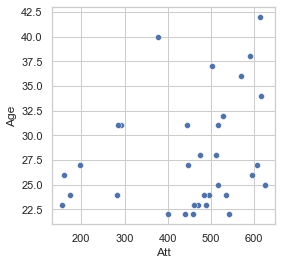

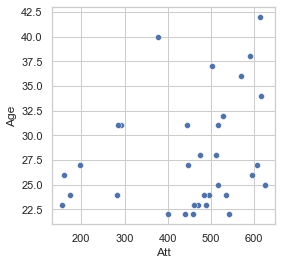

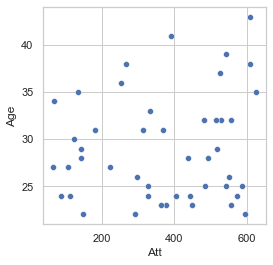

In [260]:

#2018
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
sns.scatterplot(DF_QB_PM_2018['Att'], DF_QB_PM_2018['Age'])
#2019
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
sns.scatterplot(DF_QB_PM_2019['Att'], DF_QB_PM_2019['Age'])
#2020
sns.set_style('whitegrid')
plt.figure(figsize=(4, 4))
sns.scatterplot(DF_QB_PM_2020['Att'], DF_QB_PM_2020['Age'])
# sns.histplot(ax=axes[0], x=DF_QB_PM[DF_QB_PM['Height']], y=DF_QB_PM[DF_QB_PM['Cmp']]
# axes[0].set_title('2018')
